<a href="https://colab.research.google.com/github/AliMamaghani1999/DeepLearning-HW2/blob/main/HW2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/international_matches.csv')

#Part-A

In [ ]:
print(df[df.shape[0]-10:df.shape[0]])

             date               home_team            away_team  \
23911  2022-06-14                 Ukraine  Republic of Ireland   
23912  2022-06-14  Bosnia and Herzegovina              Finland   
23913  2022-06-14                 Romania           Montenegro   
23914  2022-06-14              Luxembourg        Faroe Islands   
23915  2022-06-14                  Turkey            Lithuania   
23916  2022-06-14                 Moldova              Andorra   
23917  2022-06-14           Liechtenstein               Latvia   
23918  2022-06-14                   Chile                Ghana   
23919  2022-06-14                   Japan              Tunisia   
23920  2022-06-14          Korea Republic                Egypt   

      home_team_continent away_team_continent  home_team_fifa_rank  \
23911              Europe              Europe                   27   
23912              Europe              Europe                   59   
23913              Europe              Europe                  

#Part-B

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')
(23921, 3) (11761, 3) (6771, 3) (5389, 3)


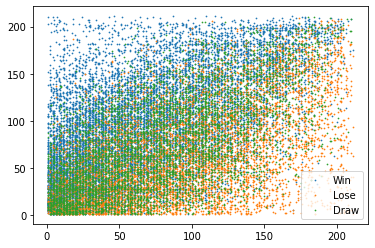

In [ ]:
print(df.columns)
df2=df[['home_team_fifa_rank', 'away_team_fifa_rank','home_team_result']]
df3=df2[df2['home_team_result']=='Win']
df4=df2[df2['home_team_result']=='Lose']
df5=df2[df2['home_team_result']=='Draw']
print(df2.shape,df3.shape,df4.shape,df5.shape)
plt.scatter(df3['home_team_fifa_rank'],df3['away_team_fifa_rank'],label="Win",s=0.5)
plt.scatter(df4['home_team_fifa_rank'],df4['away_team_fifa_rank'],label="Lose",s=0.5)
plt.scatter(df5['home_team_fifa_rank'],df5['away_team_fifa_rank'],label="Draw",s=0.5)
plt.legend(["Win","Lose","Draw"])



#Part-C

In [ ]:
df_filtter1=df[df['home_team_total_fifa_points']!=0]
df_filtter=df_filtter1[df_filtter1['away_team_total_fifa_points']!=0]
print(df.shape,df_filtter1.shape,df_filtter.shape)
X=df_filtter[['home_team_total_fifa_points','away_team_total_fifa_points','away_team_fifa_rank','home_team_fifa_rank']]
y=df_filtter['home_team_result']
print(y)

(23921, 25) (9631, 25) (9594, 25)
14250     Win
14251    Draw
14252     Win
14253     Win
14254    Lose
         ... 
23916     Win
23917    Lose
23918    Lose
23919    Lose
23920     Win
Name: home_team_result, Length: 9594, dtype: object


In [ ]:
x_tr=X[0:int(X.shape[0]*0.75)]
y_tr=y[0:int(X.shape[0]*0.75)]
x_te=X[int(X.shape[0]*0.75):]
y_te=y[int(X.shape[0]*0.75):]

#Part-D

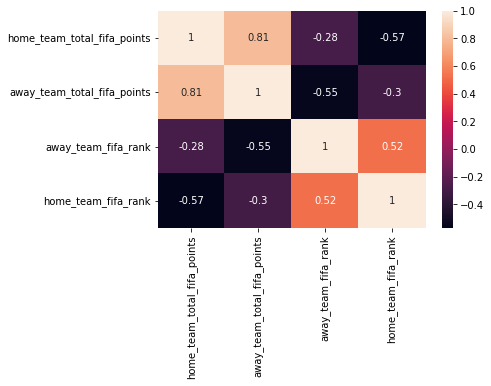

In [ ]:
import seaborn as sb
dataplot = sb.heatmap(X.corr(), annot=True)
plt.show()

# Part-E

In [ ]:
import torch
import torch.nn as nn


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.net_stack = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        y = self.net_stack(x)
        return y


In [ ]:
model=NeuralNetwork()

# Part-F

In [ ]:
#print(model)
model.train()

NeuralNetwork(
  (net_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
    (7): Softmax(dim=1)
  )
)

In [ ]:
x_tr_ten=torch.Tensor(x_tr.values)
x_te_ten=torch.Tensor(x_te.values)
#print(x_tr_ten)
y_tr_ten=torch.zeros(y_tr.shape,dtype=torch.int64)
y_te_ten=torch.zeros(y_te.shape,dtype=torch.int64)
for i in range (y_tr.shape[0]):
  if y_tr.values[i]=='Win' :
    y_tr_ten[i]=torch.tensor(0)
  if y_tr.values[i]=='Lose' :
    y_tr_ten[i]=torch.tensor(1)
  if y_tr.values[i]=='Draw' :
    y_tr_ten[i]=torch.tensor(2)
for i in range (y_te.shape[0]):
  if y_te.values[i]=='Win' :
    y_te_ten[i]=torch.tensor(0)
  if y_te.values[i]=='Lose' :
    y_te_ten[i]=torch.tensor(1)
  if y_te.values[i]=='Draw' :
    y_te_ten[i]=torch.tensor(2)

In [ ]:
data_train=[]
data_test=[]
for i in range(y_tr.shape[0]):
  data_train.append((x_tr_ten[i],y_tr_ten[i]))
for i in range(y_te.shape[0]):
  data_test.append((x_te_ten[i],y_te_ten[i]))

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 20

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y.to(dtype=torch.int64))
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(data_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

In [ ]:
epochs = 20
model.train()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

Epoch 1
-------------------------------
loss: 1.180367  [    0/ 7195]
loss: 1.230468  [ 1000/ 7195]
loss: 1.054488  [ 2000/ 7195]
loss: 1.251441  [ 3000/ 7195]
loss: 1.165202  [ 4000/ 7195]
loss: 1.351258  [ 5000/ 7195]
loss: 1.238769  [ 6000/ 7195]
loss: 1.296632  [ 7000/ 7195]
Test Error: 
 Accuracy: 29.5%, Avg loss: 1.256260 

Epoch 2
-------------------------------
loss: 1.329693  [    0/ 7195]
loss: 1.331979  [ 1000/ 7195]
loss: 1.139703  [ 2000/ 7195]
loss: 0.934434  [ 3000/ 7195]
loss: 1.315892  [ 4000/ 7195]
loss: 1.174863  [ 5000/ 7195]
loss: 1.118129  [ 6000/ 7195]
loss: 1.052849  [ 7000/ 7195]
Test Error: 
 Accuracy: 29.8%, Avg loss: 1.215226 

Epoch 3
-------------------------------
loss: 1.399523  [    0/ 7195]
loss: 1.324655  [ 1000/ 7195]
loss: 1.138788  [ 2000/ 7195]
loss: 1.135427  [ 3000/ 7195]
loss: 1.230931  [ 4000/ 7195]
loss: 1.094075  [ 5000/ 7195]
loss: 1.115994  [ 6000/ 7195]
loss: 0.781963  [ 7000/ 7195]
Test Error: 
 Accuracy: 53.6%, Avg loss: 0.997720 

Epoc

test accuracy is greater than 55 so we dont need to chenge anything!

# Part-G

In [ ]:
match=torch.tensor([[20,5,1564.61,1728.47],
                    [20,16,1564.61,1627.47],
                    [20,19,1564.61,1569.82]])
pred=model(match).argmax(dim=1)

pred_l=[]
for i in range(3):
  if pred[i]==0:
    pred_l.append("win")
  if pred[i]==1:
    pred_l.append("Lose")
  if pred[i]==2:
    pred_l.append("Draw")
print("Iran Vs England:",pred_l[0])
print("Iran Vs USA:",pred_l[1])
print("Iran Vs Walse:",pred_l[2])

Iran Vs England: win
Iran Vs USA: win
Iran Vs Walse: win
